# Week 6
# Plotting with Matplotlib
1. Create subplots
2. Adjust ticks, legends, labels
3. Add annotations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Download Bitcoin trading data
import json
import requests
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=USD&limit=2000')
BTC = pd.DataFrame(json.loads(res.content)['Data'])

# Use time as index
BTC = BTC.set_index('time')
BTC.index = pd.to_datetime(BTC.index, unit='s')

BTC.tail(3)# 

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2023-03-18,27746.59,26658.45,27440.55,48417.21,1.324020e+09,26973.38,direct,
2023-03-19,28448.08,26902.00,26973.38,48141.92,1.337304e+09,28037.32,direct,
2023-03-20,28534.79,27229.43,28037.32,37121.22,1.037155e+09,28161.52,direct,


In [3]:
# Install yahoo finance library
!pip install --upgrade pip
!pip install yfinance

     |████████████████████████████████| 2.1 MB 9.2 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 10.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.2/132.2 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 10.8 MB/s eta 0:00:0031m11.8 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.9/195.9 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2021.3
    Uninstalling pytz-2021.3:
      Successfully uninstalled pytz-2021.3
  Attempting uninstall: lxml
    Fo

In [4]:
import yfinance as yf

SPY = yf.download('SPY', start="2015-04-10")
SPY.head(3)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-04-10,209.199997,210.089996,208.960007,210.039993,181.563049,72722900
2015-04-13,209.869995,210.630005,209.029999,209.089996,180.741837,74436600
2015-04-14,208.850006,209.710007,208.100006,209.490005,181.087601,75099900


## 1. Four plots on the price change
- Scatter plot
- Histogram

Text(0.5, 1.0, 'S&P 500 Index')

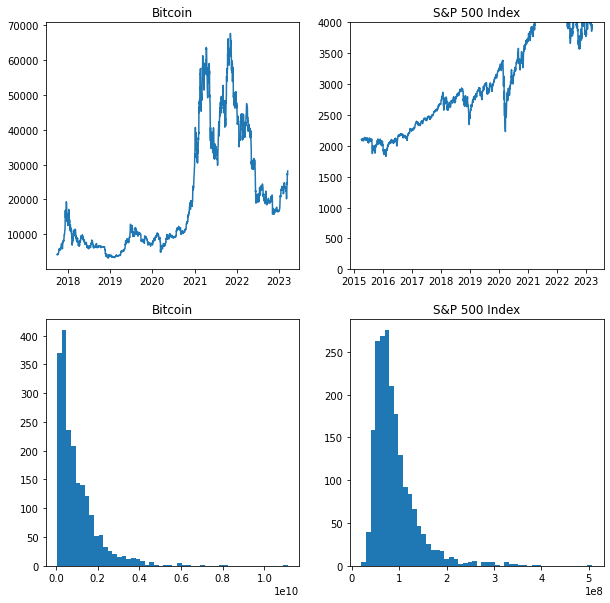

In [5]:
fig = plt.figure(figsize=(10, 10))

# Add axes for the first subplot
ax1 = fig.add_subplot(2, 2, 1) # What do these numbers mean?
                               # (number of rows, number of columns, the index of this particular plot)

# plot BTC price change (close price vs. time)
ax1.plot(BTC.index, BTC['close'])
ax1.set_title("Bitcoin")

# Add axes for the second subplot
ax2 = fig.add_subplot(2, 2, 2)

# plot SPY price change (close price vs. time)
ax2.plot(SPY.index, SPY['Close'] * 10)
ax2.set_title("S&P 500 Index")
ax2.set_ylim([0, 4000])

# The third subplot
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(BTC['volumeto'], bins=50)
ax3.set_title("Bitcoin")

# The fourth subplot
ax4 = fig.add_subplot(2, 2, 4)
ax4.hist(SPY['Volume'], bins=50)
ax4.set_title("S&P 500 Index")

## 2 Ticks, labels, and legends

(2500.0, 15000.0)

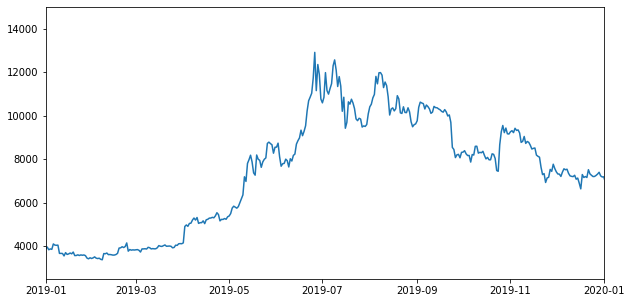

In [6]:
# Specify limits on the x-axis and y-axis
from datetime import datetime

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
plt.ylim([2500, 15000])

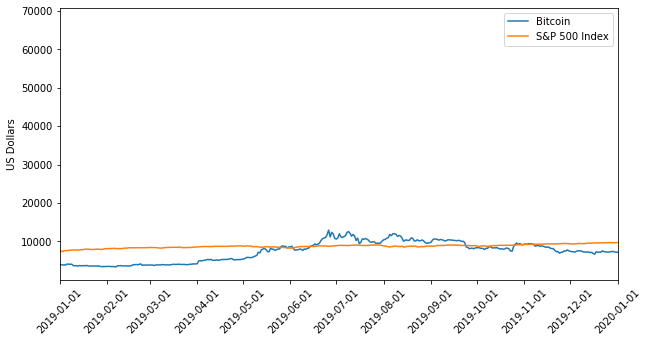

In [7]:
# Show ticks for every month
plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])
plt.plot(SPY.index, SPY['Close'] * 30)
plt.xlim([datetime(2019, 1, 1), datetime(2020, 1, 1)])
ticks = [datetime(2019, x, 1) for x in range(1, 13)]
ticks.append(datetime(2020, 1, 1))
plt.xticks(ticks, rotation=45)

# Add y label
plt.ylabel("US Dollars")

# Add legned
plt.legend(['Bitcoin', 'S&P 500 Index'])

plt.show()

## 3. Add Annotations

Text(2017-05-01 00:00:00, 1500, 'Bitcoin price increased 5 times within 200 days')

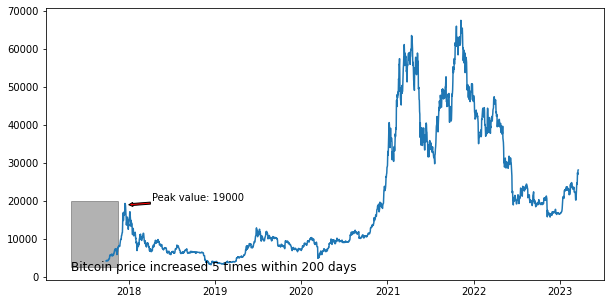

In [8]:
from datetime import timedelta

plt.figure(figsize=(10, 5))
plt.plot(BTC.index, BTC['close'])

# Point out the peak value
plt.annotate('Peak value: 19000',
             xy=(datetime(2018, 1, 1), 19000),
             xytext=(datetime(2018, 1, 1)+timedelta(days=100), 20000),
             arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=4))

# Highlight the dramatic increase in 2018
rectangle = plt.Rectangle((datetime(2017, 5, 1), 2500),
                          timedelta(days=200),
                          17500,
                          color='k',
                          alpha=0.3)
plt.gca().add_patch(rectangle)

# Add text description
plt.text(datetime(2017, 5, 1),
         1500,
         "Bitcoin price increased 5 times within 200 days",
         fontsize=12)